Importing the necessary libraries

***pandas*** - Data manipulation and analysis library for structured data (DataFrames, CSV handling, data cleaning)

***matplotlib*** - Foundational plotting library for creating static, animated, and interactive visualizations

***sqlite3*** - Built-in Python interface for SQLite databases, enabling lightweight SQL operations

***seaborn*** - Statistical data visualization library built on matplotlib with attractive default styles and advanced plot types

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

Reading the csv using pd.read_csv() and checking the first 5 rows with `df.head()`

`df.head()` - Displays the first 5 rows of a DataFrame (or specify number with `df.head(n)`) for quick data preview and structure inspection.

`pd.read_csv()` - Reads CSV files into pandas DataFrames, with options for custom separators, headers, data types, and encoding.

Example:
```python
df=pd.read_csv("path to your csv")
print(df.head(7))
```

In [ ]:
df=pd.read_csv("/content/World-Stock-Prices-Dataset.csv")
print(df.head())

                        Date        Open        High         Low       Close  \
0  2025-07-03 00:00:00-04:00    6.630000    6.740000    6.615000    6.640000   
1  2025-07-03 00:00:00-04:00  106.750000  108.370003  106.330101  107.339996   
2  2025-07-03 00:00:00-04:00  122.629997  123.050003  121.550003  121.930000   
3  2025-07-03 00:00:00-04:00  221.705002  224.009995  221.360001  223.410004   
4  2025-07-03 00:00:00-04:00  212.145004  214.649994  211.810104  213.550003   

       Volume Brand_Name Ticker Industry_Tag  Country  Dividends  \
0   4209664.0    peloton   PTON      fitness      usa        0.0   
1    560190.0      crocs   CROX     footwear      usa        0.0   
2     36600.0     adidas  ADDYY      apparel  germany        0.0   
3  29295154.0     amazon   AMZN   e-commerce      usa        0.0   
4  34697317.0      apple   AAPL   technology      usa        0.0   

   Stock Splits  Capital Gains  
0           0.0            NaN  
1           0.0            NaN  
2          

Connecting to SQL using `sqlite3.connect`.
Creating an SQL table using `df.to_sql` to work with the csv using SQL

`sqlite3.connect` allows user to connect to the SQL base to create a table and work with it

Table creation structure:
```python
df.to_sql("Stock", conn, index=False, if_exists="replace")  
```
- `"Stock"` — name of the table in the SQLite database.  
- `conn` — the database connection (e.g., `connection` from `sqlite3.connect()`).  
- `index=` — set to `False` to exclude DataFrame index as a column (recommended).  
- `if_exists=` — specifies behavior if table exists:  
  - `'fail'` — if the table exists, raises an error (default),  
  - `'replace'` — drops the table and creates a new one,  
  - `'append'` — adds data to the existing table.

Another Example:
```python
df.to_sql("sales", connection, index=False, if_exists="fail")
```

In [ ]:
conn = sqlite3.connect(":memory:")
df.to_sql("Stock", conn, index=False, if_exists="replace")


310122

Creating a sql query, converting the date to a year using `strftime("%Y", Date)`, calculating the average of high and low to demonstrate it as average stock, ordering by years using `ORDER BY Year ASC` for years to be displayed from the beginning. Leaving only years between 2005 and 2025 using `AND` And `strftime("%Y", Date)` as the value

`strftime("%Y", Date)` — extracts the year from the date.

It also can extract a month (`strftime("%m", Date`) or a day  (`strftime("%d", Date`)

`ORDER BY Year ASC` - lists results chronologically by years

Example:`ORDER BY Sales DESC` lists sales from the biggest sale to the smallest

`BETWEEN` checks if a value is within a specified range (inclusive).  

Example: `x BETWEEN 10 AND 20` means `x >= 10 AND x <= 20`.

In [ ]:
query="""
SELECT Brand_Name,
   strftime("%Y", Date) AS Year,
   (High+Low) / 2 AS Average
FROM Stock
WHERE Brand_Name IN ("google", "nvidia", "apple")
AND strftime('%Y', Date) BETWEEN "2005" AND "2025"
ORDER BY Year ASC
"""
data=pd.read_sql_query(query, conn)
print(data.head())

  Brand_Name  Year    Average
0      apple  2005   2.163977
1     nvidia  2005   2.808852
2     google  2005  10.409785
3     nvidia  2005   2.879570
4      apple  2005   2.201415


And finally, creating the lineplot with seaborn.

Setting up figure size with `plt.figsize` so all the years are visible.

Setting up `fontsize` for labels and title, moving legend to the left corner with `loc`, making it bigger so it will be more comfortable to read it

Creating annotations with `ax.annotate`, setting up the style of arrows with `arrowstyle`, fontsize and color with `facecolor`.

Showing the result with `plt.show()`

`plt.figure(figsize=...)` — sets the figure size.

Example:
```python
plt.figure(figsize=(10,6) # Creates a 1000 x 400 figure
```

`ax.annotate` - allows user to create annotations on the plot.
`plt.legend(loc=...)` - Sets up location of the legend.

Example:
```python
plt.legend(loc="upper right")
```
`arrowprops=dict(arrowstyle=...)` — sets the arrow style for the annotation.

/tmp/ipython-input-1183039772.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(


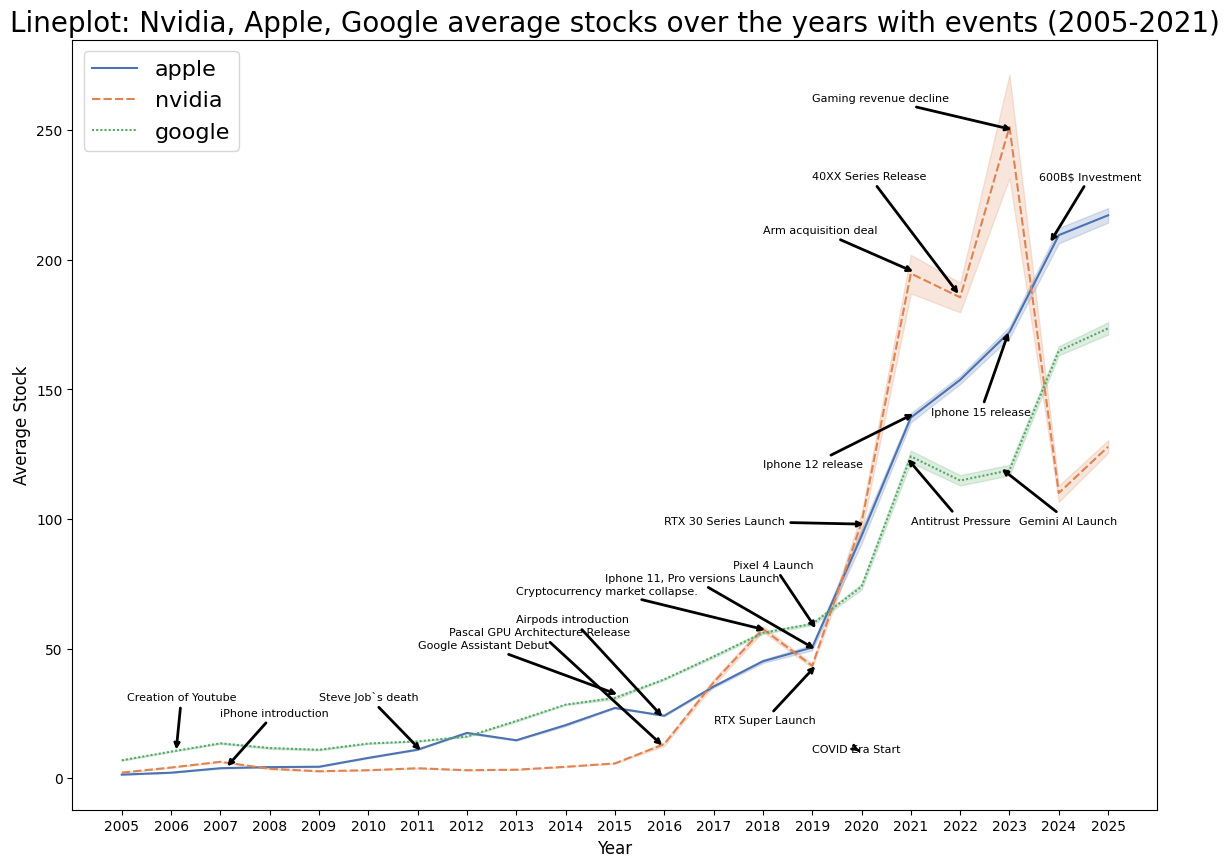

In [ ]:
plt.figure(figsize=(14,10))
ax = sns.lineplot(data=data, x="Year", y="Average", style="Brand_Name", hue="Brand_Name", palette="deep")
plt.ylabel("Average Stock", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Lineplot: Nvidia, Apple, Google average stocks over the years with events (2005-2021)", fontsize=20)
plt.legend(
    loc="upper left",
    fontsize=16
)
annotations=[
    {"text":"Creation of Youtube", "xy":(1.1,10), "xytext":(0.1, 30)},
    {"text":"iPhone introduction", "xy":(2.1,3.8), "xytext":(2, 24)},
    {"text":"Steve Job`s death", "xy":(6.1,10), "xytext":(4, 30)},
    {"text":"Google Assistant Debut ", "xy":(10.1,32), "xytext":(6, 50)},
    {"text":"Airpods introduction", "xy":(11,23), "xytext":(8, 60)},
    {"text":"Pascal GPU Architecture Release", "xy":(11,12), "xytext":(6.635, 55)},
    {"text":"Cryptocurrency market collapse.", "xy":(13.1,57), "xytext":(8, 71)},
    {"text":"RTX Super Launch", "xy":(14.1,44), "xytext":(12, 21)},
    {"text":"Pixel 4 Launch", "xy":(14.1,57), "xytext":(12.4, 81)},
    {"text":"Iphone 11, Pro versions Launch", "xy":(14.1,49.4), "xytext":(9.8, 76)},
    {"text":"RTX 30 Series Launch", "xy":(15.1,98), "xytext":(11, 98)},
    {"text":"COVID Era Start", "xy":(15,10), "xytext":(14, 10)},
    {"text":"Antitrust Pressure", "xy":(15.9,124), "xytext":(16, 98)},
    {"text":"Iphone 12 release", "xy":(16.1,141), "xytext":(13, 120)},
    {"text":"Arm acquisition deal", "xy":(16.1,195), "xytext":(13, 210)},
    {"text":"40XX Series Release", "xy":(17,186), "xytext":(14, 231)},
    {"text":"Iphone 15 release", "xy":(18,173), "xytext":(16.4, 140)},
    {"text":"Gemini AI Launch", "xy":(17.8,120), "xytext":(18.2, 98)},
    {"text":"Gaming revenue decline", "xy":(18.1,250), "xytext":(14, 261)},
    {"text":"600B$ Investment", "xy":(18.8,206), "xytext":(18.6, 231)},
]

for ann in annotations:
  ax.annotate(
  ann["text"],
  xy=ann["xy"], xycoords="data",
  xytext=ann["xytext"], textcoords="data",
  arrowprops=dict(facecolor="black", arrowstyle="->", color="black", lw=2),
  fontsize=8
  )

plt.show()